In [6]:
%matplotlib inline
import numpy as np
import pysal as ps
#import random as rdm
from pysal.contrib.viz import mapping as maps
from pylab import *
import shapefile    # explore the shape file

# data explore

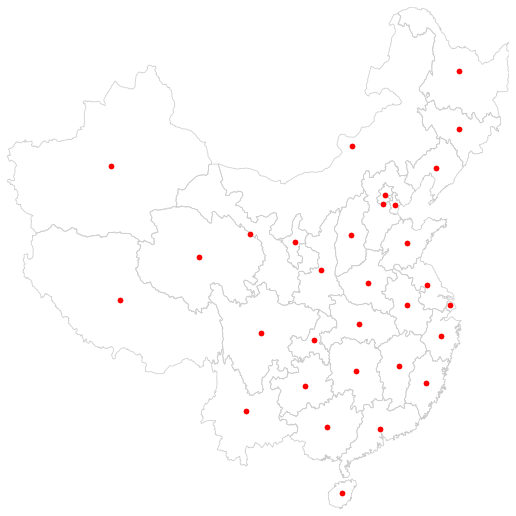

In [7]:
shp_link = "/home/zack/桌面/map/china 31st province/jjb.shp"
shp = ps.open(shp_link)
#some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_link)]

fig = figure(figsize=(9,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
#some = maps.map_poly_shp(shp, which=some)
#some.set_alpha(0.5)
#some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_link)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, pts], [shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

In [15]:
fs = open("./map/china 31st province/jjb.shp", 'rb')
fd = open("./map/china 31st province/jjb.DBF", 'rb')
sf = shapefile.Reader(shp=fs, dbf = fd)

In [16]:
shapes = sf.shapes()

In [17]:
len(shapes)

31

In [18]:
len(list(sf.iterShapes()))

31

In [22]:
for name in dir(shapes[3]):
    print name

__doc__
__geo_interface__
__init__
__module__
bbox
parts
points
shapeType


In [23]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['RDC2013', 'N', 18, 7],
 ['RDC2010', 'N', 18, 7],
 ['RDC2006', 'N', 18, 7],
 ['RDC2003', 'N', 18, 7],
 ['RDP2013', 'N', 18, 7],
 ['RDP2010', 'N', 18, 7],
 ['RDP2006', 'N', 18, 7],
 ['RDP2003', 'N', 18, 7],
 ['PAT2010', 'N', 18, 7],
 ['PAT2006', 'N', 18, 7],
 ['PAT2003', 'N', 18, 7],
 ['PAT2013', 'N', 18, 7],
 ['POLY_ID', 'N', 18, 0],
 ['NAME', 'C', 50, 0]]

In [24]:
records = sf.records()
shapeRecs = sf.shapeRecords()

In [29]:
records[3][1:3]

[115101.0, 49749.0]

In [28]:
for i in range(len(shapeRecs)):
    province = records[i][1]
    print province
    print shapeRecs[i].shape.points[0]

1230434.0
(1329152.3414017234, 5619034.277789807)
266545.0
(-2189253.374862124, 4611401.367287194)
898835.0
(761692.0922243244, 4443124.842984671)
115101.0
(-34477.04571853654, 4516813.963033689)
14599.0
(-2189253.374862124, 4611401.367287194)
6720045.0
(915805.6573841742, 4438424.998678743)
2111675.0
(915805.6573841742, 4438424.998678743)
8579491.0
(1261146.3386806066, 4381810.235464148)
1637219.0
(1016688.4148203882, 4289114.799616914)
2641180.0
(547929.6201997625, 4087821.9802104393)
4942349.0
(1509095.537319281, 3967508.2528986745)
871527.0
(1128791.9382861028, 3795290.4218160138)
1865584.0
(603782.4642828768, 3731355.9419286465)
441672.0
(-570115.6600693259, 3642220.94310207)
299665.0
(418866.8065542669, 3550593.867170212)
1708982.0
(1353003.3900327682, 3630724.022309715)
628696.0
(606776.9833997192, 3326376.4923846014)
8087478.0
(879282.1756355852, 3233583.966835156)
70204.0
(587206.9236229978, 2591517.4652551264)
758005.0
(1329152.3414017234, 5619034.277789807)
2874703.0
(144485

In [6]:
provinces = pysal.rook_from_shapefile("/home/zack/桌面/map/china 31st province/jjb.shp")

print 'Number of Proviences in shapefile: ', provinces.n 

#  print out the list of neighbors for each County Polygon ID
print 'Neighbors for Each County Polygon ID:'
print provinces.neighbors
print ' ' # prints blank line, cosmetic

('Island id: ', [18])
Number of Proviences in shapefile:  31
Neighbors for Each County Polygon ID:
{0: [25, 19], 1: [4, 22, 23], 2: [24, 25, 27, 6], 3: [24, 25, 23], 4: [1, 30, 13, 22], 5: [8, 27, 6, 7], 6: [2, 5, 8, 9, 24, 27], 7: [8, 10, 28, 5], 8: [5, 6, 7, 9, 10, 11], 9: [6, 8, 11, 12, 24, 26], 10: [8, 15, 11, 28, 7], 11: [8, 9, 10, 12, 15, 17], 12: [9, 11, 14, 16, 17, 26], 13: [16, 4, 30, 14], 14: [16, 26, 12, 13, 30], 15: [17, 10, 11], 16: [17, 12, 13, 14], 17: [16, 11, 12, 15], 18: [], 19: [0, 25, 20], 20: [27, 25, 19], 21: [27, 29], 22: [1, 4, 30, 23], 23: [1, 3, 22, 24, 25, 30], 24: [2, 3, 6, 9, 23, 25, 26, 30], 25: [0, 2, 3, 19, 20, 23, 24, 27], 26: [24, 9, 12, 30, 14], 27: [2, 5, 6, 20, 21, 25, 29], 28: [10, 7], 29: [27, 21], 30: [4, 13, 14, 22, 23, 24, 26]}
 


# compute global moran'i

In [8]:
def read_data(filename, year):
    f = ps.open(filename)
    num = np.array(f.by_col[year])
    names = list(f.by_col['province'])
    return num, names

In [9]:
filename = "./province_count.csv"

In [10]:
shp_path = "./map/china 31st province/jjb.shp"
qw = ps.queen_from_shapefile(shp_path)
qw.transform = 'r'
#dataframe = ps.pdio.read_files(shp_path)

('Island id: ', [18])
('WARNING: ', 18, ' is an island (no neighbors)')


In [13]:
def moran_i(filename):
    morans = []
    for i in range(2013, 2017):
        count, _ = read_data(filename, str(i))
        moran = ps.Moran(count, qw)
        morans.append([moran.I, moran.p_sim])
    return morans

In [14]:
morans = moran_i(filename)

In [15]:
morans

[[-0.11877179873528838, 0.23400000000000001],
 [-0.11979597793900523, 0.20499999999999999],
 [-0.08724131852832695, 0.309],
 [-0.083516434060848257, 0.36099999999999999]]

# Local autocorrelation local G

In [21]:
# distance based spatial weight matrix
thresh = ps.min_threshold_dist_from_shapefile(shp_path)
thresh

1077658.8741696263

In [25]:
dist_w = ps.threshold_binaryW_from_shapefile(shp_path, thresh)

In [26]:
dist_w.transform = 'B'

In [28]:
# Compute G
from pysal.esda.getisord import G_Local
lg = G_Local(counts, dist_w)

In [30]:
lg.p_sim

array([ 0.196,  0.129,  0.252,  0.165,  0.205,  0.261,  0.298,  0.294,
        0.214,  0.196,  0.477,  0.235,  0.038,  0.129,  0.098,  0.329,
        0.063,  0.135,  0.318,  0.278,  0.19 ,  0.405,  0.265,  0.497,
        0.287,  0.449,  0.443,  0.415,  0.33 ,  0.428,  0.252])

In [37]:
for ch, i in zip(names, list(lg.p_sim)):
    print ch, i

 江苏 0.196
 上海 0.129
 北京 0.252
 山东 0.165
 浙江 0.205
 广东 0.261
 四川 0.298
 安徽 0.294
 重庆 0.214
 福建 0.196
 湖北 0.477
 河南 0.235
 陕西 0.038
 湖南 0.129
 黑龙 0.098
 天津 0.329
 辽宁 0.063
 广西 0.135
 河北 0.318
 江西 0.278
 吉林 0.19
 山西 0.405
 甘肃 0.265
 云南 0.497
 新疆 0.287
 贵州 0.449
 海南 0.443
 宁夏 0.415
 内蒙 0.33
 青海 0.428
 西藏 0.252


In [31]:
sig = lg.p_sim<0.05
lg.p_sim[sig]

array([ 0.038])

In [38]:
# compute the G* 
lgstar = G_Local(counts, dist_w, star=True)

In [39]:
lgstar.p_sim

array([ 0.197,  0.138,  0.265,  0.169,  0.19 ,  0.274,  0.242,  0.237,
        0.201,  0.21 ,  0.489,  0.242,  0.055,  0.124,  0.089,  0.309,
        0.059,  0.137,  0.279,  0.286,  0.186,  0.411,  0.246,  0.494,
        0.289,  0.447,  0.436,  0.419,  0.301,  0.414,  0.26 ])

In [40]:
for ch, i in zip(names, list(lgstar.p_sim)):
    print ch, i

 江苏 0.197
 上海 0.138
 北京 0.265
 山东 0.169
 浙江 0.19
 广东 0.274
 四川 0.242
 安徽 0.237
 重庆 0.201
 福建 0.21
 湖北 0.489
 河南 0.242
 陕西 0.055
 湖南 0.124
 黑龙 0.089
 天津 0.309
 辽宁 0.059
 广西 0.137
 河北 0.279
 江西 0.286
 吉林 0.186
 山西 0.411
 甘肃 0.246
 云南 0.494
 新疆 0.289
 贵州 0.447
 海南 0.436
 宁夏 0.419
 内蒙 0.301
 青海 0.414
 西藏 0.26


# moran scatter plot for 2016

In [16]:
counts, names = read_data(filename, '2016')
counts_lag = ps.lag_spatial(qw, counts)

In [11]:
b, a = np.polyfit(counts, counts_lag, 1)

In [18]:
# show the index of provinces
name = range(31)
for i, ch in zip(name, names):
    print i, ch

0  江苏
1  上海
2  北京
3  山东
4  浙江
5  广东
6  四川
7  安徽
8  重庆
9  福建
10  湖北
11  河南
12  陕西
13  湖南
14  黑龙
15  天津
16  辽宁
17  广西
18  河北
19  江西
20  吉林
21  山西
22  甘肃
23  云南
24  新疆
25  贵州
26  海南
27  宁夏
28  内蒙
29  青海
30  西藏


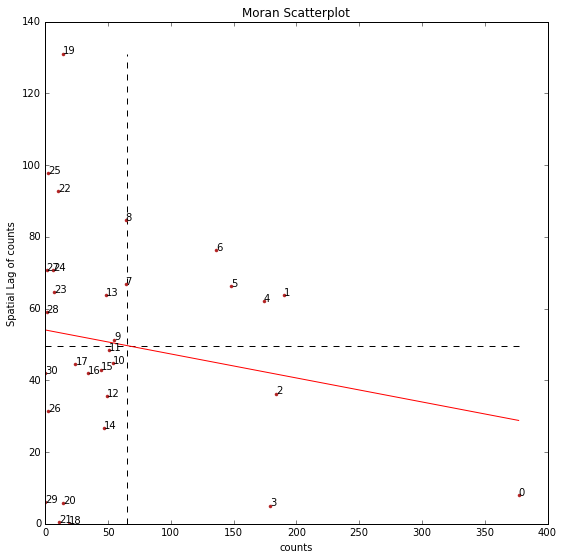

In [29]:
f, ax = plt.subplots(1, figsize=(9,9))
plt.plot(counts, counts_lag, '.', color='firebrick')
plt.vlines(counts.mean(), counts_lag.min(), counts_lag.max(), linestyle='--')
plt.hlines(counts_lag.mean(), counts.min(), counts.max(), linestyle='--')
plt.plot(counts, a+b*counts, 'r')

for i, txt in enumerate(name):
    ax.annotate(txt, (counts[i], counts_lag[i]))

plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of counts')
plt.xlabel('counts')
plt.show()
#pylab.savefig('moran_scatterplot.png')

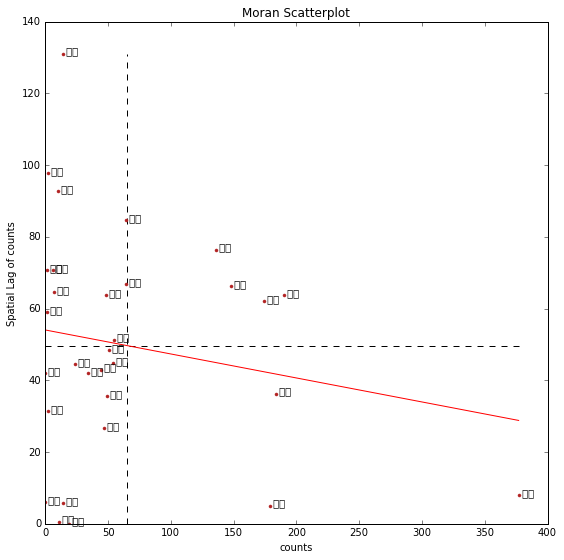

In [26]:
f, ax = plt.subplots(1, figsize=(9,9))
plt.plot(counts, counts_lag, '.', color='firebrick')
plt.vlines(counts.mean(), counts_lag.min(), counts_lag.max(), linestyle='--')
plt.hlines(counts_lag.mean(), counts.min(), counts.max(), linestyle='--')
plt.plot(counts, a+b*counts, 'r')

for i, txt in enumerate(names):
    ax.annotate('%s'%(txt.decode('utf-8')), (counts[i], counts_lag[i]), fontproperties = ChineseFont1)

plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of counts')
plt.xlabel('counts')
plt.show()